In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib qt4

In [2]:
for i in filter(lambda v: ("_1" not in v) and ("." not in v),os.listdir()):
    print(i)

OdorC_D2000_Locust_B_0
OdorC_D1000_Locust_A_0
OdorB_D2000_Locust_B_0
OdorB_D1000_Locust_B_0
OdorC_D2000_Locust_A_0
OdorA_D1000_Locust_B_0
OdorA_D2000_Locust_A_0
OdorB_D2000_Locust_A_0
__pycache__
OdorB_D1000_Locust_A_0
OdorA_D1000_Locust_A_0
OdorA_D2000_Locust_B_0
OdorC_D1000_Locust_B_0


In [3]:
# orns={}
# for i in filter(lambda v: "." not in v,os.listdir()):
#     orns[i] = np.load(i+"/ORN Firing Data.npy")
    
# al_in={}
# for i in filter(lambda v: "." not in v,os.listdir()):
#     al_in[i] = np.load(i+"/current_input.npy")[:,::100]
    
# al_out={}
# for i in filter(lambda v: "." not in v,os.listdir()):
#     al_in[i] = np.load(i+"/AL_output.npy")

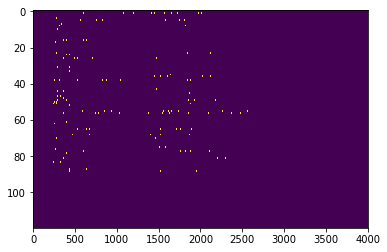

In [4]:
plt.imshow(np.load("OdorB_D1000_Locust_A_0/AL_output.npy").T>-0,aspect='auto')

/home/iiser/.conda/envs/venv/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


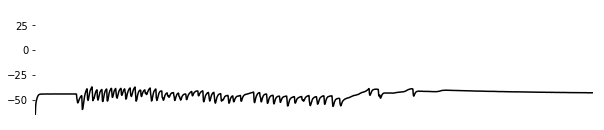

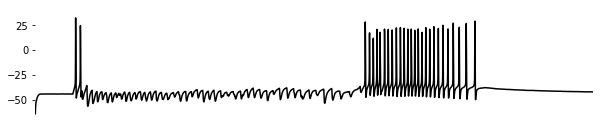

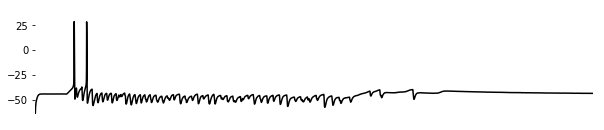

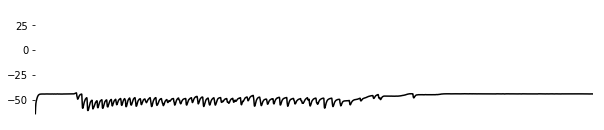

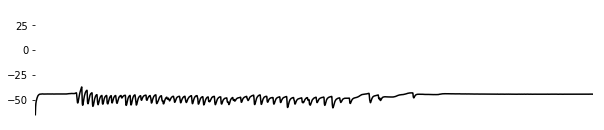

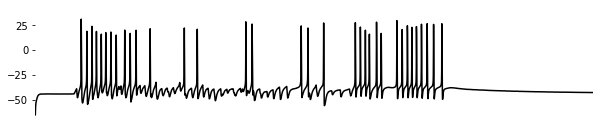

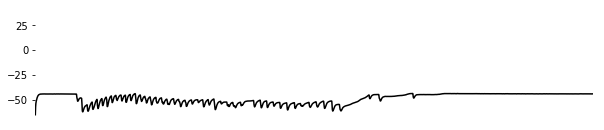

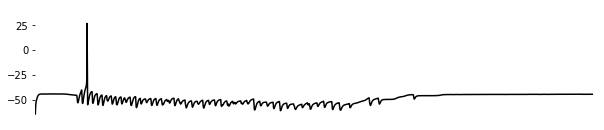

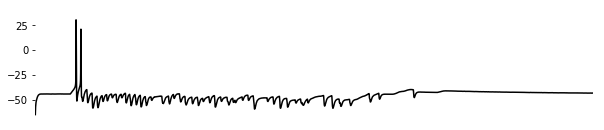

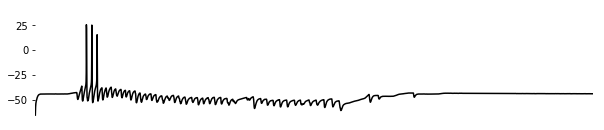

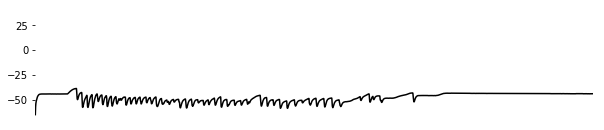

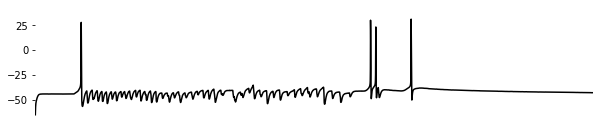

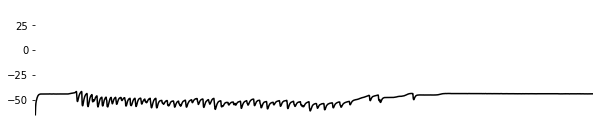

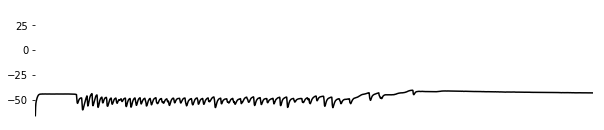

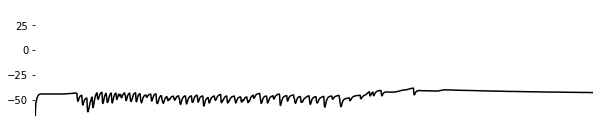

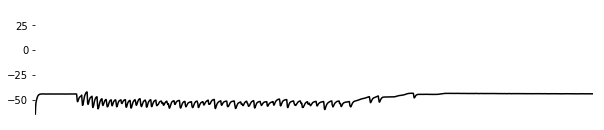

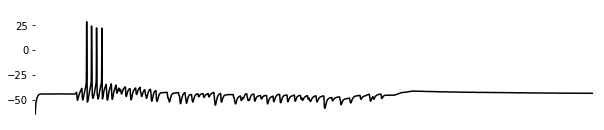

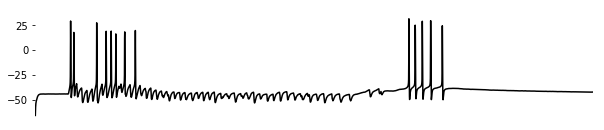

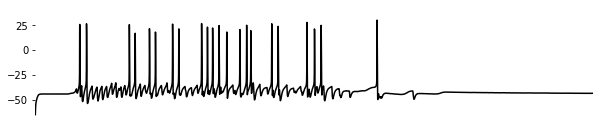

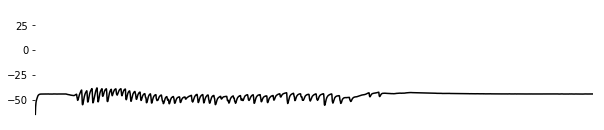

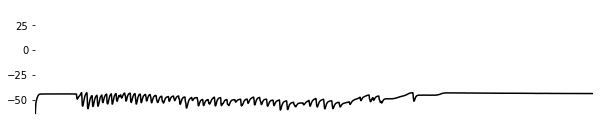

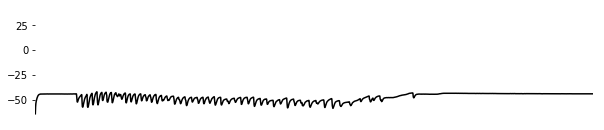

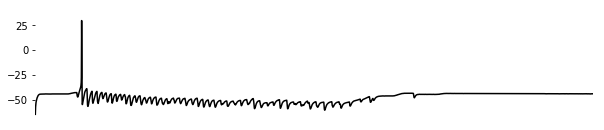

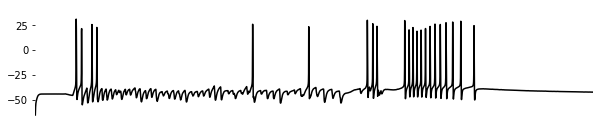

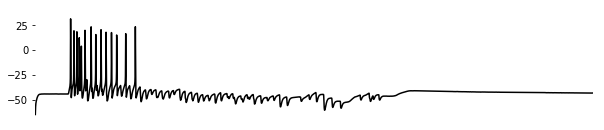

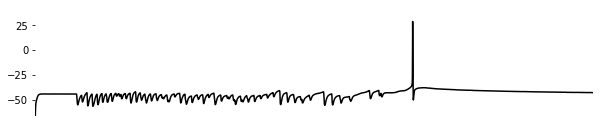

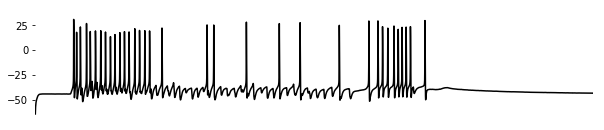

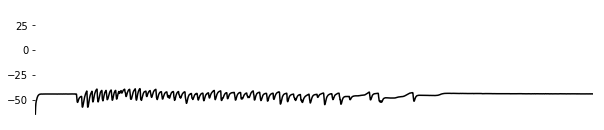

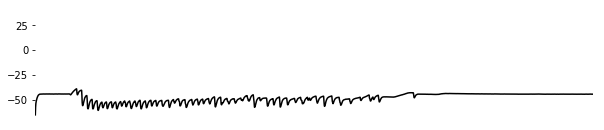

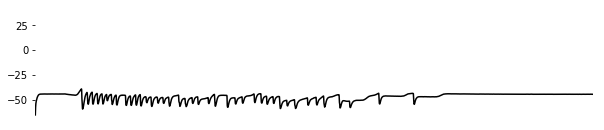

In [5]:
for i in range(30):
    plt.figure(figsize=(10,2))
    ax = plt.subplot(111)
    plt.plot(np.load("OdorA_D2000_Locust_A_0/AL_output.npy").T[i,:].T,'k')
    plt.ylim([-70,40])
    plt.xlim([0,4000])    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)    
    ax.spines['bottom'].set_visible(False)
    plt.xticks([])
    #plt.yticks([])

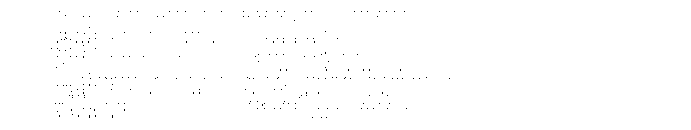

In [6]:
plt.figure(figsize=(12,2))
temp = np.load("OdorB_D1000_Locust_A_0/AL_output.npy").T[:90,:]
ax = plt.subplot(111)   
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)    
ax.spines['bottom'].set_visible(False)
plt.xticks([])
plt.yticks([])
plt.imshow(temp>0,aspect='auto',cmap='gray_r')

FileNotFoundError: [Errno 2] No such file or directory: '__pycache__/AL_output.npy'

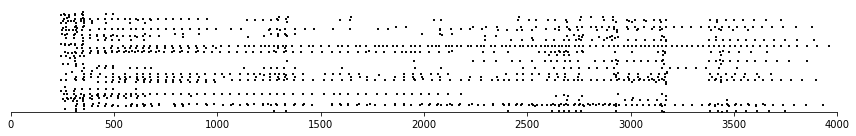

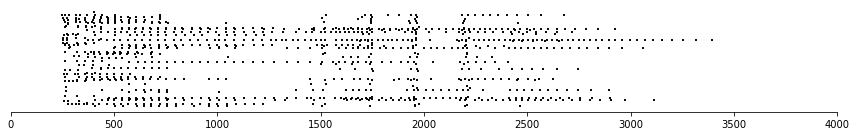

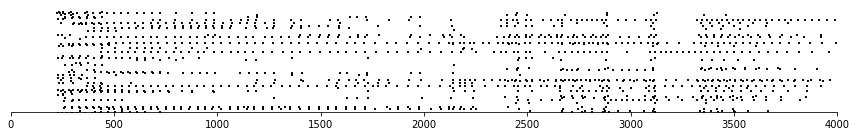

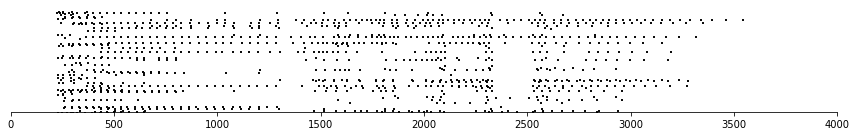

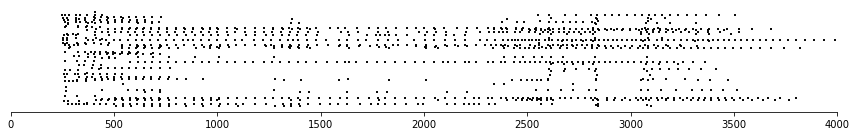

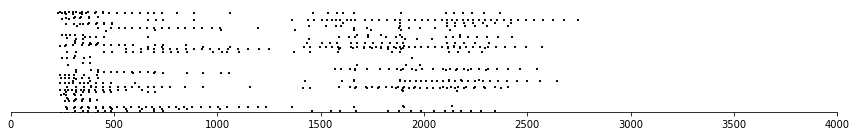

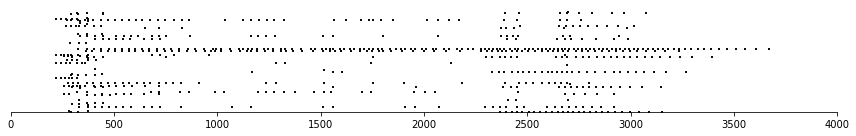

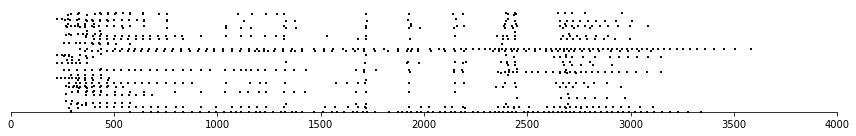

In [8]:
for i in filter(lambda v: ("_1" not in v) and ("." not in v),os.listdir()):
    temp = np.load(i+"/AL_output.npy").T[:90,:]
    lol = np.logical_and(temp[:,1:]>0,temp[:,:-1]<0)
    plt.figure(figsize=(12,2))
    ax = plt.subplot(111)   
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)    
    #ax.spines['bottom'].set_visible(False)
    #plt.xticks([])
    plt.yticks([])
    plt.xlim([0,4000])
    plt.ylim([0,90])
    #plt.imshow(temp>0,aspect='auto',cmap='gray_r')
    events = []
    for j in range(90):
        for k in range(4000):
            if lol[j,k]:
                events.append((j,k))
    events = np.array(events)
    plt.scatter(events[:,1],events[:,0],marker='s',s=1.0,c='k')
    plt.tight_layout()
    plt.savefig(i.split(".")[0]+'_PNs.png')

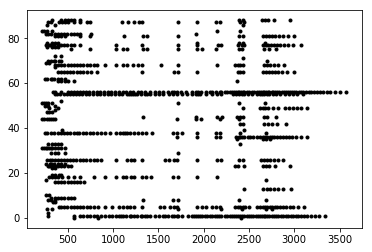

In [9]:
#np.mask(np.arra)[np.logical_and(temp[:,1:]>0,temp[:,:-1]<0)]
lol = np.logical_and(temp[:,1:]>0,temp[:,:-1]<0)
events = []
for i in range(90):
    for j in range(4000):
        if lol[i,j]:
            events.append((i,j))
events = np.array(events)
plt.plot(events[:,1],events[:,0],'k.')

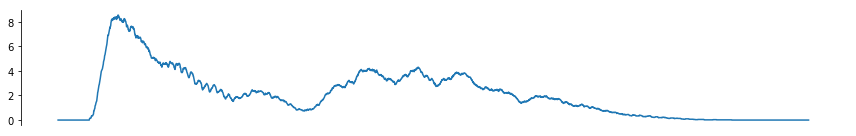

In [10]:
d1000 = []
for i in filter(lambda v: ("_1" not in v) and ("." not in v) and ("D1000" in v),os.listdir()):
    temp = np.load(i+"/AL_output.npy").T[:90,:]
    temp = np.logical_and(temp[:,1:]>0,temp[:,:-1]<0)
    d1000.append(temp)

d1000 = np.concatenate(d1000)

plt.figure(figsize=(12,2))
ax = plt.subplot(111)   
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)    
ax.spines['bottom'].set_visible(False)
plt.xticks([])
#plt.yticks([])
plt.plot(np.convolve(d1000.sum(axis=0), np.ones((100,))/100, mode='same')/0.1/6)
plt.tight_layout()
plt.savefig('d1000.png')

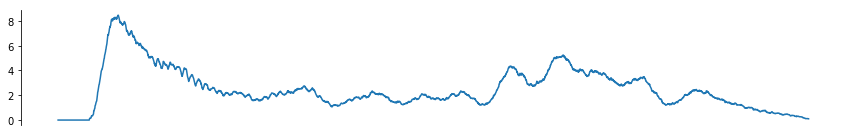

In [11]:
d2000 = []
for i in filter(lambda v: ("_1" not in v) and ("." not in v) and ("D2000" in v),os.listdir()):
    temp = np.load(i+"/AL_output.npy").T[:90,:]
    temp = np.logical_and(temp[:,1:]>0,temp[:,:-1]<0)
    d2000.append(temp)

d2000 = np.concatenate(d2000)

plt.figure(figsize=(12,2))
ax = plt.subplot(111)   
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)    
ax.spines['bottom'].set_visible(False)
plt.xticks([])
#plt.yticks([])
plt.plot(np.convolve(d2000.sum(axis=0), np.ones((100,))/100, mode='same')/0.1/6)
plt.tight_layout()
plt.savefig('d2000.png')

In [12]:
def runningResponsive(x,N):
    y = np.zeros(x.shape[1])
    for ctr in range(int(N/2),x.shape[1]-int(N/2)):
         y[ctr] = (np.sum(x[:,ctr-int(N/2):ctr+int(N/2)],axis=1)>0).mean()
    return y

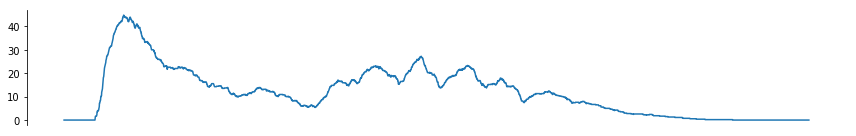

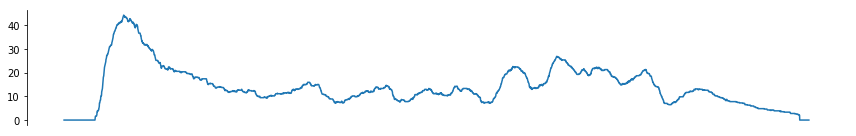

In [13]:
plt.figure(figsize=(12,2))
ax = plt.subplot(111)   
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)    
ax.spines['bottom'].set_visible(False)
plt.xticks([])
#plt.yticks([])
plt.plot(runningResponsive(d1000,100)*100)
plt.tight_layout()
plt.savefig('d1000_res.png')
plt.figure(figsize=(12,2))
ax = plt.subplot(111)   
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)    
ax.spines['bottom'].set_visible(False)
plt.xticks([])
#plt.yticks([])
plt.plot(runningResponsive(d2000,100)*100)
plt.tight_layout()
plt.savefig('d2000_res.png')

In [14]:
from sklearn.decomposition import PCA

model = PCA(n_components=3)
for i in filter(lambda v: ("_1" not in v) and ("." not in v) and ("A" in v),os.listdir()):
    temp = np.load(i+"/AL_output.npy").T[:90,:]
    model.fit(temp)

In [15]:
traj = model.transform(temp)

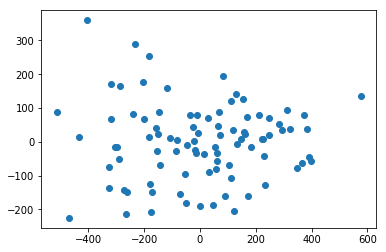

In [16]:
plt.plot(traj[:,0],traj[:,1],'o')

/home/iiser/.conda/envs/venv/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


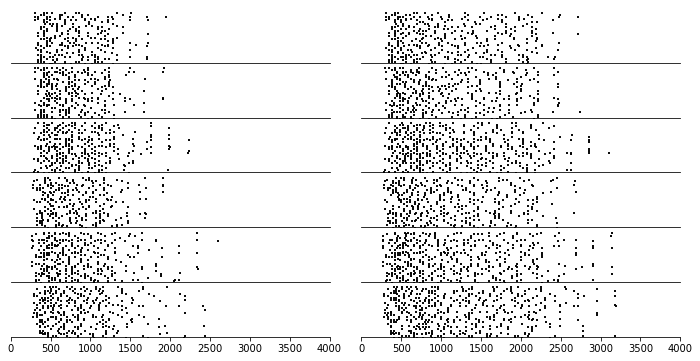

In [17]:
import matplotlib.gridspec as gridspec

files = ['OdorA_D1000_Locust_A_0','OdorA_D2000_Locust_A_0',
'OdorB_D1000_Locust_A_0','OdorB_D2000_Locust_A_0',
'OdorC_D1000_Locust_A_0','OdorC_D2000_Locust_A_0',
'OdorA_D1000_Locust_B_0','OdorA_D2000_Locust_B_0',
'OdorB_D1000_Locust_B_0','OdorB_D2000_Locust_B_0',
'OdorC_D1000_Locust_B_0','OdorC_D2000_Locust_B_0']

plt.figure(figsize=(12,6))
gs1 = gridspec.GridSpec(6, 2)
gs1.update(wspace=0.1, hspace=0.05)

for n,i in enumerate(files):
    temp = np.load(i+"/AL_output.npy").T[90:,:]
    lol = np.logical_and(temp[:,1:]>-20,temp[:,:-1]<-20)
    ax = plt.subplot(gs1[n])   
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)    
    #ax.spines['bottom'].set_visible(False)
    if n<10:
        plt.xticks([])
    plt.yticks([])
    plt.xlim([0,4000])
    plt.ylim([0,30])
    #plt.imshow(temp>0,aspect='auto',cmap='gray_r')
    events = []
    for j in range(30):
        for k in range(4000):
            if lol[j,k]:
                events.append((j,k))
    events = np.array(events)
    plt.scatter(events[:,1],events[:,0],marker='s',s=1.0,c='k')
plt.tight_layout()
    #plt.savefig(i.split(".")[0]+'_PNs.png')

([], <a list of 0 Text xticklabel objects>)

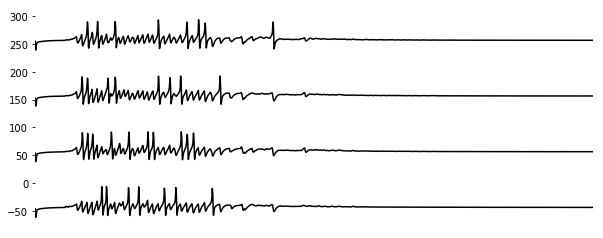

In [18]:
plt.figure(figsize=(10,4))
ax = plt.subplot(111)
for i in range(4):
    plt.plot(100*i+np.load("OdorA_D1000_Locust_A_0/AL_output.npy").T[90+i,:].T,'k')
    #plt.ylim([-70,40])
    plt.xlim([0,4000])    
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)    
ax.spines['bottom'].set_visible(False)
plt.xticks([])
#plt.yticks([])

In [19]:
def runningClusters(x,N):
    y = np.zeros(x.shape[1])
    for ctr in range(int(N/2),x.shape[1]-int(N/2)):
        data = x[:,ctr-int(N/2):ctr+int(N/2)]
         #y[ctr] = (np.sum(,axis=1)>0).mean()
    return y

In [20]:
model = PCA(n_components=2)
#model.fit(temp)
N = 500
for ctr in range(int(N/2),temp.shape[1]-int(N/2)):
    data = temp[:,ctr-int(N/2):ctr+int(N/2)]
    loc = model.fit(data)

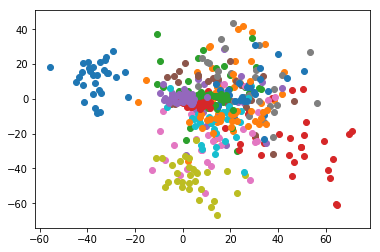

In [21]:
N = 500
for ctr in range(int(N/2),temp.shape[1]-int(N/2),int(N/2)):
    data = temp[:,ctr-int(N/2):ctr+int(N/2)]
    loc = model.transform(data)
    plt.scatter(loc[:,0],loc[:,1])

In [22]:
model.explained_variance_ratio_

array([0.50540703, 0.10475379])

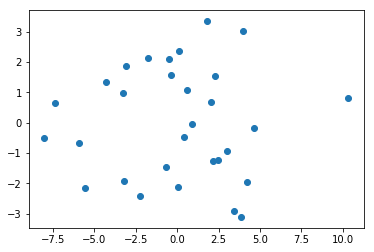

In [23]:
loc = model.transform(data)
plt.scatter(loc[:,0],loc[:,1])

In [32]:
def euclid_array(a,b):
    x1 = a[:,0]
    y1 = a[:,1]
    x2 = b[:,0]
    y2 = b[:,1]
    return np.sqrt((x1-x2)**2+(y1-y2)**2)
def euclid_arrayn(a,b):
    sums = 0
    for i in range(a.shape[1]):
        sums = sums+ (np.convolve(a[:,i], np.ones((100,))/100, mode='same')-np.convolve(b[:,i], np.ones((100,))/100, mode='same'))**2
    return np.sqrt(sums)
def euclid(a,b):
    x1 = a[0]
    y1 = a[1]
    x2 = b[0]
    y2 = b[1]
    return np.sqrt((x1-x2)**2+(y1-y2)**2)

In [42]:
temp1 = np.load("OdorA_D1000_Locust_A_0/AL_output.npy").T[90:,:]
temp2 = np.load("OdorC_D1000_Locust_A_0/AL_output.npy").T[90:,:]
temp3 = np.load("OdorA_D2000_Locust_A_0/AL_output.npy").T[90:,:]

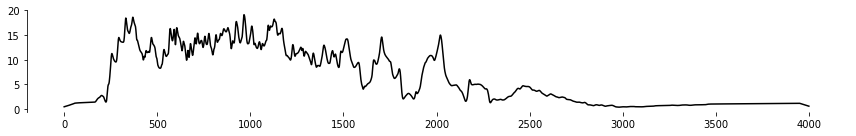

In [43]:
plt.figure(figsize=(12,2))
ax = plt.subplot(111)   
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)    
ax.spines['bottom'].set_visible(False)
#plt.xticks([])
#plt.yticks([])
plt.plot(euclid_arrayn(temp1.T,temp2.T),'k')
plt.tight_layout()
plt.savefig('centre_distance_AC.png')


fit
102 780


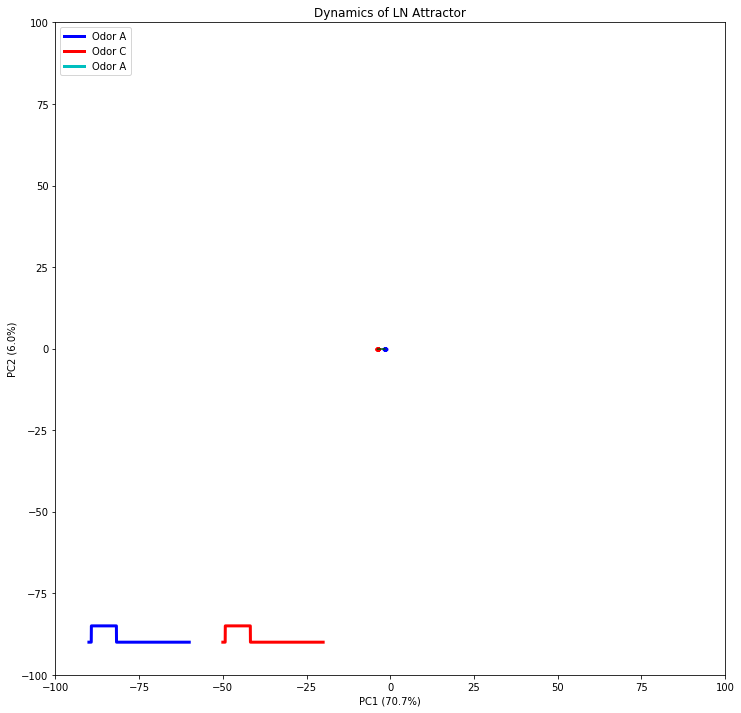

In [48]:
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

model = PCA(n_components=2)
N = 100
for ctr in range(temp.shape[1]-N):
    data = temp1[:,ctr:ctr+N]
    model.fit(data)
    data = temp2[:,ctr:ctr+N]
    model.fit(data)
    data = temp3[:,ctr:ctr+N]
    model.fit(data)
print("fit")

res = 5
n_frames = int((4000-N)/res)

odor1000 = -90*np.ones(n_frames)
odor1000[int(n_frames*((200-N)/4000)):int(n_frames*((1200-N)/4000))] = -85
odor2000 = -80*np.ones(n_frames)
odor2000[int(n_frames*((200-N)/4000)):int(n_frames*((2200-N)/4000))] = -75
timeA = np.linspace(-90,-60,n_frames)
timeC = np.linspace(-50,-20,n_frames)

centre_distance_AC =[]
centre_distance_AA =[]
neuron_distance_AC_mean =[]
neuron_distance_AA_mean =[]
neuron_distance_AC_std =[]
neuron_distance_AA_std =[]

fig = plt.figure(figsize=(12,12))
ax = plt.axes(xlim=(-100, 100), ylim=(-100, 100))
line1, = ax.plot([], [], 'b.',lw=3)
odor1, = ax.plot([], [], 'b',lw=3, label = 'Odor A')
line2, = ax.plot([], [], 'r.',lw=3)
odor2, = ax.plot([], [], 'r',lw=3, label = 'Odor C')
line3, = ax.plot([], [], 'c.',lw=3)
odor3, = ax.plot([], [], 'c',lw=3)#, label = 'Odor A')

line4a, = ax.plot([], [], 'k-',lw=1)
line4b, = ax.plot([], [], 'k-',lw=1, alpha = 0.2)

line5a, = ax.plot([], [], 'g-',lw=1)
line5b, = ax.plot([], [], 'g-',lw=1, alpha = 0.2)


def init():
    line1.set_data([], [])
    line3.set_data([], [])
    line2.set_data([], [])
    odor1.set_data([], [])
    odor3.set_data([], [])
    odor2.set_data([], [])
    line4.set_data([], [])
    return line1,odor1,line2,odor2,line3,odor3,line4a,line4b,line5a,line5b,

def animate(i):
    print(i,end='\r')
    
    data = temp1[:,res*i:res*i+N]
    loc1 = model.transform(data)
    line1.set_data(loc1[:,0], loc1[:,1])
    odor1.set_data(timeA[:i], odor1000[:i])
    
    data = temp2[:,res*i:res*i+N]
    loc2 = model.transform(data)
    line2.set_data(loc2[:,0], loc2[:,1])
    odor2.set_data(timeC[:i], odor1000[:i])
    
    data = temp3[:,res*i:res*i+N]
    loc3 = model.transform(data)
    #line3.set_data(loc3[:,0], loc3[:,1])
    #odor3.set_data(timeA[:i], odor2000[:i])
    
    line4a.set_data([loc1[0,0],loc2[0,0]],[loc1[0,1],loc2[0,1]])
    #line4b.set_data([loc1[0,0],loc3[0,0]],[loc1[0,1],loc3[0,1]])
    
    line5a.set_data([loc1[:,0].mean(),loc2[:,0].mean()],[loc1[:,1].mean(),loc2[:,1].mean()])
    #line5b.set_data([loc1[:,0].mean(),loc3[:,0].mean()],[loc1[:,1].mean(),loc3[:,1].mean()])
    
    centre_distance_AC.append(euclid(loc1.mean(axis=0),loc2.mean(axis=0)))
    centre_distance_AA.append(euclid(loc1.mean(axis=0),loc3.mean(axis=0)))
    
    neuron_distance_AC = euclid_array(loc1,loc2)
    neuron_distance_AA = euclid_array(loc1,loc3)
    
    neuron_distance_AC_mean.append(neuron_distance_AC.mean())
    neuron_distance_AA_mean.append(neuron_distance_AA.mean())
    neuron_distance_AC_std.append(neuron_distance_AC.std())
    neuron_distance_AA_std.append(neuron_distance_AA.std())
    
    return line1,odor1,line2,odor2,line3,odor3,line4a,line4b,line5a,line5b,

slowdown_factor = 0.05
time_taken = 4000/slowdown_factor
interval = time_taken/n_frames

print(int(interval),n_frames)

plt.title("Dynamics of LN Attractor")
plt.xlabel("PC1 ({:0.1f}%)".format(model.explained_variance_ratio_[0]*100))
plt.ylabel("PC2 ({:0.1f}%)".format(model.explained_variance_ratio_[1]*100))
plt.legend(loc=2)

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=n_frames, interval=interval, blit=True)

anim.save('dynamics.mp4', writer=writer)
#anim.save('dynamics.gif')

In [49]:
centre_distance_AC =np.array(centre_distance_AC)
centre_distance_AA =np.array(centre_distance_AA)
neuron_distance_AC_mean =np.array(neuron_distance_AC_mean)
neuron_distance_AA_mean =np.array(neuron_distance_AA_mean)
neuron_distance_AC_std =np.array(neuron_distance_AC_std)
neuron_distance_AA_std =np.array(neuron_distance_AA_std)

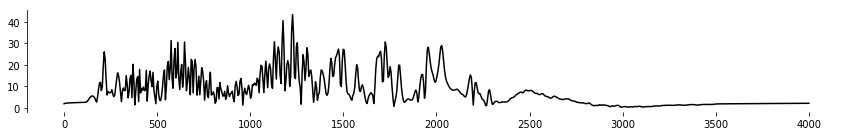

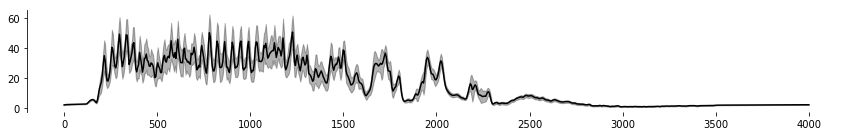

In [38]:
plt.figure(figsize=(12,2))
ax = plt.subplot(111)   
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)    
ax.spines['bottom'].set_visible(False)
#plt.xticks([])
#plt.yticks([])
plt.plot(np.linspace(0,4000,n_frames),np.convolve(centre_distance_AC, np.ones((1,))/1, mode='same'),'k')
plt.tight_layout()
plt.savefig('centre_distance_AC.png')
plt.figure(figsize=(12,2))
ax = plt.subplot(111)   
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)    
ax.spines['bottom'].set_visible(False)
#plt.xticks([])
#plt.yticks([])
plt.plot(np.linspace(0,4000,n_frames),np.convolve(neuron_distance_AC_mean, np.ones((1,))/1, mode='same'),'k')
plt.fill_between(np.linspace(0,4000,n_frames),neuron_distance_AC_mean-neuron_distance_AC_std/2,neuron_distance_AC_mean+neuron_distance_AC_std/2,color='k',alpha=0.3)
plt.tight_layout()
plt.savefig('centre_distance_AA.png')

In [51]:
temp1 = np.load("OdorA_D1000_Locust_A_0/AL_output.npy").T[:90,:]
temp2 = np.load("OdorC_D1000_Locust_A_0/AL_output.npy").T[:90,:]
temp3 = np.load("OdorA_D2000_Locust_A_0/AL_output.npy").T[:90,:]

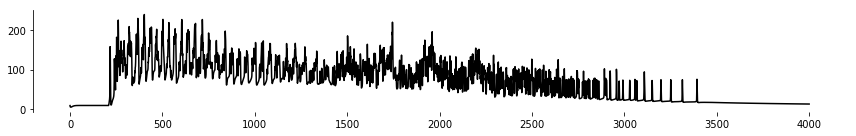

In [53]:
def euclid_arrayn(a,b):
    sums = 0
    for i in range(a.shape[1]):
        sums = sums+ (a[:,i]-b[:,i])**2
    return np.sqrt(sums)

plt.figure(figsize=(12,2))
ax = plt.subplot(111)   
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)    
ax.spines['bottom'].set_visible(False)
#plt.xticks([])
#plt.yticks([])
plt.plot(euclid_arrayn(temp1.T,temp2.T),'k')
plt.tight_layout()
#plt.savefig('centre_distance_AC.png')


fit
102 780


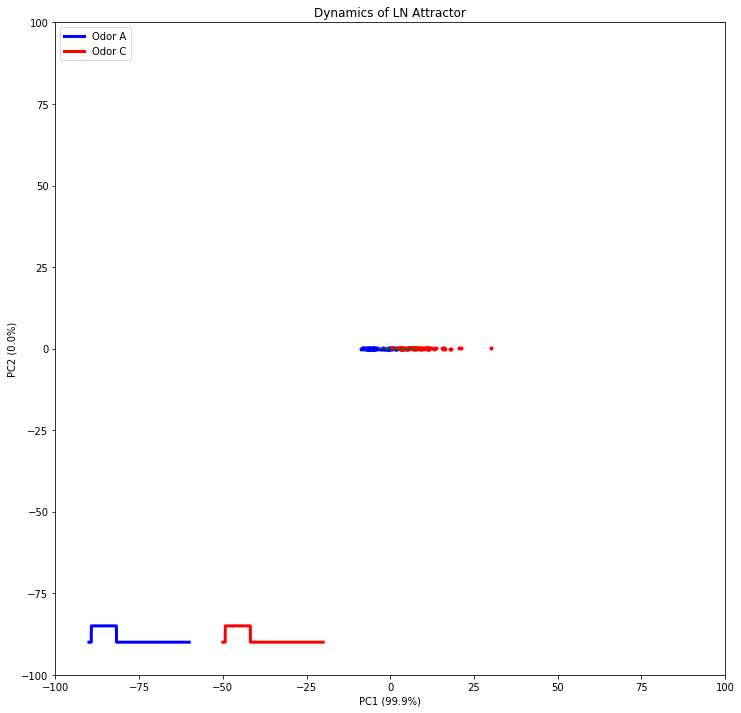

In [55]:
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

model = PCA(n_components=2)
N = 100
for ctr in range(temp.shape[1]-N):
    data = temp1[:,ctr:ctr+N]
    model.fit(data)
    data = temp2[:,ctr:ctr+N]
    model.fit(data)
    data = temp3[:,ctr:ctr+N]
    model.fit(data)
print("fit")

res = 5
n_frames = int((4000-N)/res)

odor1000 = -90*np.ones(n_frames)
odor1000[int(n_frames*((200-N)/4000)):int(n_frames*((1200-N)/4000))] = -85
odor2000 = -80*np.ones(n_frames)
odor2000[int(n_frames*((200-N)/4000)):int(n_frames*((2200-N)/4000))] = -75
timeA = np.linspace(-90,-60,n_frames)
timeC = np.linspace(-50,-20,n_frames)

centre_distance_AC =[]
centre_distance_AA =[]
neuron_distance_AC_mean =[]
neuron_distance_AA_mean =[]
neuron_distance_AC_std =[]
neuron_distance_AA_std =[]

fig = plt.figure(figsize=(12,12))
ax = plt.axes(xlim=(-100, 100), ylim=(-100, 100))
line1, = ax.plot([], [], 'b.',lw=3)
odor1, = ax.plot([], [], 'b',lw=3, label = 'Odor A')
line2, = ax.plot([], [], 'r.',lw=3)
odor2, = ax.plot([], [], 'r',lw=3, label = 'Odor C')
line3, = ax.plot([], [], 'c.',lw=3)
odor3, = ax.plot([], [], 'c',lw=3)#, label = 'Odor A')

line4a, = ax.plot([], [], 'k-',lw=1)
line4b, = ax.plot([], [], 'k-',lw=1, alpha = 0.2)

line5a, = ax.plot([], [], 'g-',lw=1)
line5b, = ax.plot([], [], 'g-',lw=1, alpha = 0.2)


def init():
    line1.set_data([], [])
    line3.set_data([], [])
    line2.set_data([], [])
    odor1.set_data([], [])
    odor3.set_data([], [])
    odor2.set_data([], [])
    line4.set_data([], [])
    return line1,odor1,line2,odor2,line3,odor3,line4a,line4b,line5a,line5b,

def animate(i):
    print(i,end='\r')
    
    data = temp1[:,res*i:res*i+N]
    loc1 = model.transform(data)
    line1.set_data(loc1[:,0], loc1[:,1])
    odor1.set_data(timeA[:i], odor1000[:i])
    
    data = temp2[:,res*i:res*i+N]
    loc2 = model.transform(data)
    line2.set_data(loc2[:,0], loc2[:,1])
    odor2.set_data(timeC[:i], odor1000[:i])
    
    data = temp3[:,res*i:res*i+N]
    loc3 = model.transform(data)
    #line3.set_data(loc3[:,0], loc3[:,1])
    #odor3.set_data(timeA[:i], odor2000[:i])
    
    line4a.set_data([loc1[0,0],loc2[0,0]],[loc1[0,1],loc2[0,1]])
    #line4b.set_data([loc1[0,0],loc3[0,0]],[loc1[0,1],loc3[0,1]])
    
    line5a.set_data([loc1[:,0].mean(),loc2[:,0].mean()],[loc1[:,1].mean(),loc2[:,1].mean()])
    #line5b.set_data([loc1[:,0].mean(),loc3[:,0].mean()],[loc1[:,1].mean(),loc3[:,1].mean()])
    
    centre_distance_AC.append(euclid(loc1.mean(axis=0),loc2.mean(axis=0)))
    centre_distance_AA.append(euclid(loc1.mean(axis=0),loc3.mean(axis=0)))
    
    neuron_distance_AC = euclid_array(loc1,loc2)
    neuron_distance_AA = euclid_array(loc1,loc3)
    
    neuron_distance_AC_mean.append(neuron_distance_AC.mean())
    neuron_distance_AA_mean.append(neuron_distance_AA.mean())
    neuron_distance_AC_std.append(neuron_distance_AC.std())
    neuron_distance_AA_std.append(neuron_distance_AA.std())
    
    return line1,odor1,line2,odor2,line3,odor3,line4a,line4b,line5a,line5b,

slowdown_factor = 0.05
time_taken = 4000/slowdown_factor
interval = time_taken/n_frames

print(int(interval),n_frames)

plt.title("Dynamics of LN Attractor")
plt.xlabel("PC1 ({:0.1f}%)".format(model.explained_variance_ratio_[0]*100))
plt.ylabel("PC2 ({:0.1f}%)".format(model.explained_variance_ratio_[1]*100))
plt.legend(loc=2)

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=n_frames, interval=interval, blit=True)

anim.save('dynamics_pn.mp4', writer=writer)
#anim.save('dynamics.gif')

In [49]:
centre_distance_AC =np.array(centre_distance_AC)
centre_distance_AA =np.array(centre_distance_AA)
neuron_distance_AC_mean =np.array(neuron_distance_AC_mean)
neuron_distance_AA_mean =np.array(neuron_distance_AA_mean)
neuron_distance_AC_std =np.array(neuron_distance_AC_std)
neuron_distance_AA_std =np.array(neuron_distance_AA_std)

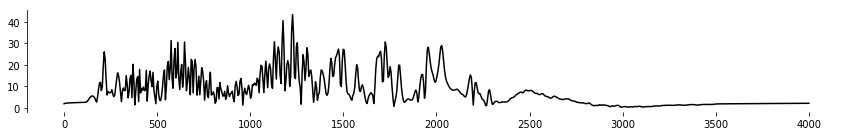

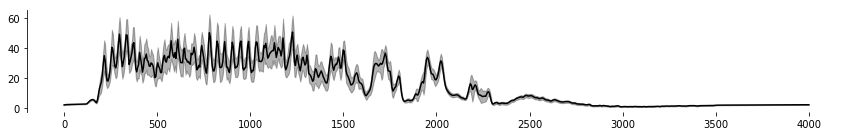

In [38]:
plt.figure(figsize=(12,2))
ax = plt.subplot(111)   
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)    
ax.spines['bottom'].set_visible(False)
#plt.xticks([])
#plt.yticks([])
plt.plot(np.linspace(0,4000,n_frames),np.convolve(centre_distance_AC, np.ones((1,))/1, mode='same'),'k')
plt.tight_layout()
plt.savefig('centre_distance_AC.png')
plt.figure(figsize=(12,2))
ax = plt.subplot(111)   
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)    
ax.spines['bottom'].set_visible(False)
#plt.xticks([])
#plt.yticks([])
plt.plot(np.linspace(0,4000,n_frames),np.convolve(neuron_distance_AC_mean, np.ones((1,))/1, mode='same'),'k')
plt.fill_between(np.linspace(0,4000,n_frames),neuron_distance_AC_mean-neuron_distance_AC_std/2,neuron_distance_AC_mean+neuron_distance_AC_std/2,color='k',alpha=0.3)
plt.tight_layout()
plt.savefig('centre_distance_AA.png')

In [71]:
temp1 = np.load("OdorA_D2000_Locust_A_0/AL_output.npy").T[90:,:]
temp2 = np.load("OdorC_D2000_Locust_A_0/AL_output.npy").T[90:,:]
temp3 = np.load("OdorA_D1000_Locust_A_0/AL_output.npy").T[90:,:]

fit
102 780


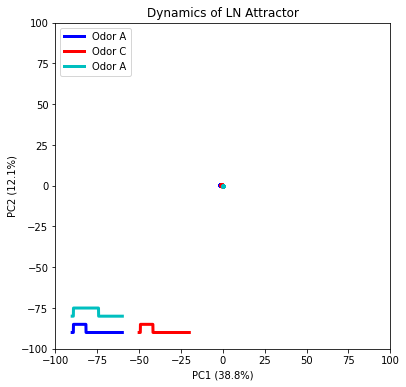

In [72]:
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

model = PCA(n_components=2)
N = 100
for ctr in range(temp.shape[1]-N):
    data = temp1[:,ctr:ctr+N]
    model.fit(data)
    data = temp2[:,ctr:ctr+N]
    model.fit(data)
    data = temp3[:,ctr:ctr+N]
    model.fit(data)
print("fit")

res = 5
n_frames = int((4000-N)/res)

odor2000 = -90*np.ones(n_frames)
odor2000[int(n_frames*((200-N)/4000)):int(n_frames*((1200-N)/4000))] = -85
odor1000 = -80*np.ones(n_frames)
odor1000[int(n_frames*((200-N)/4000)):int(n_frames*((2200-N)/4000))] = -75
timeA = np.linspace(-90,-60,n_frames)
timeC = np.linspace(-50,-20,n_frames)

centre_distance_AC =[]
centre_distance_AA =[]
neuron_distance_AC_mean =[]
neuron_distance_AA_mean =[]
neuron_distance_AC_std =[]
neuron_distance_AA_std =[]

fig = plt.figure(figsize=(6,6))
ax = plt.axes(xlim=(-100, 100), ylim=(-100, 100))
line1, = ax.plot([], [], 'b.',lw=3)
odor1, = ax.plot([], [], 'b',lw=3, label = 'Odor A')
line2, = ax.plot([], [], 'r.',lw=3)
odor2, = ax.plot([], [], 'r',lw=3, label = 'Odor C')
line3, = ax.plot([], [], 'c.',lw=3)
odor3, = ax.plot([], [], 'c',lw=3, label = 'Odor A')


def init():
    line1.set_data([], [])
    line3.set_data([], [])
    line2.set_data([], [])
    odor1.set_data([], [])
    odor3.set_data([], [])
    odor2.set_data([], [])
    return line1,odor1,line2,odor2,line3,odor3,

def animate(i):
    print(i,end='\r')
    
    data = temp1[:,res*i:res*i+N]
    loc1 = model.transform(data)
    line1.set_data(loc1[:,0], loc1[:,1])
    odor1.set_data(timeA[:i], odor2000[:i])
    
    data = temp2[:,res*i:res*i+N]
    loc2 = model.transform(data)
    line2.set_data(loc2[:,0], loc2[:,1])
    odor2.set_data(timeC[:i], odor2000[:i])
    
    data = temp3[:,res*i:res*i+N]
    loc3 = model.transform(data)
    line3.set_data(loc3[:,0], loc3[:,1])
    odor3.set_data(timeA[:i], odor1000[:i])
    
    centre_distance_AC.append(euclid(loc1.mean(axis=0),loc2.mean(axis=0)))
    centre_distance_AA.append(euclid(loc1.mean(axis=0),loc3.mean(axis=0)))
    
    neuron_distance_AC = euclid_array(loc1,loc2)
    neuron_distance_AA = euclid_array(loc1,loc3)
    
    neuron_distance_AC_mean.append(neuron_distance_AC.mean())
    neuron_distance_AA_mean.append(neuron_distance_AA.mean())
    neuron_distance_AC_std.append(neuron_distance_AC.std())
    neuron_distance_AA_std.append(neuron_distance_AA.std())
    
    return line1,odor1,line2,odor2,line3,odor3,

slowdown_factor = 0.05
time_taken = 4000/slowdown_factor
interval = time_taken/n_frames

print(int(interval),n_frames)

plt.title("Dynamics of LN Attractor")
plt.xlabel("PC1 ({:0.1f}%)".format(model.explained_variance_ratio_[0]*100))
plt.ylabel("PC2 ({:0.1f}%)".format(model.explained_variance_ratio_[1]*100))
plt.legend(loc=2)

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=n_frames, interval=interval, blit=True)

anim.save('dynamics_2.mp4', writer=writer)
#anim.save('dynamics.gif')

In [73]:
centre_distance_AC =np.array(centre_distance_AC)
centre_distance_AA =np.array(centre_distance_AA)
neuron_distance_AC_mean =np.array(neuron_distance_AC_mean)
neuron_distance_AA_mean =np.array(neuron_distance_AA_mean)
neuron_distance_AC_std =np.array(neuron_distance_AC_std)
neuron_distance_AA_std =np.array(neuron_distance_AA_std)

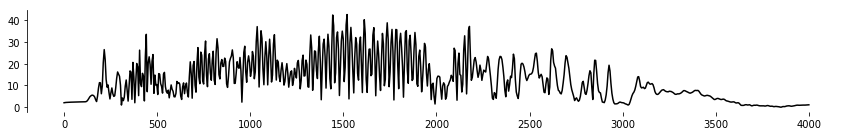

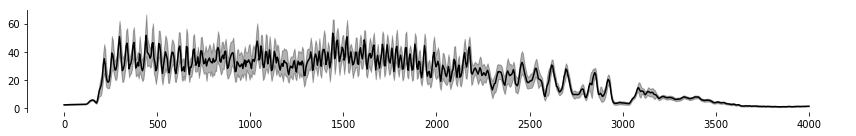

In [74]:
plt.figure(figsize=(12,2))
ax = plt.subplot(111)   
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)    
ax.spines['bottom'].set_visible(False)
#plt.xticks([])
#plt.yticks([])
plt.plot(np.linspace(0,4000,n_frames),np.convolve(centre_distance_AC, np.ones((1,))/1, mode='same'),'k')
plt.tight_layout()
plt.savefig('centre_distance_AC.png')
plt.figure(figsize=(12,2))
ax = plt.subplot(111)   
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)    
ax.spines['bottom'].set_visible(False)
#plt.xticks([])
#plt.yticks([])
plt.plot(np.linspace(0,4000,n_frames),np.convolve(neuron_distance_AC_mean, np.ones((1,))/1, mode='same'),'k')
plt.fill_between(np.linspace(0,4000,n_frames),neuron_distance_AC_mean-neuron_distance_AC_std/2,neuron_distance_AC_mean+neuron_distance_AC_std/2,color='k',alpha=0.3)
plt.tight_layout()
plt.savefig('centre_distance_AA.png')

In [53]:
100/4000*n_frames

19.5

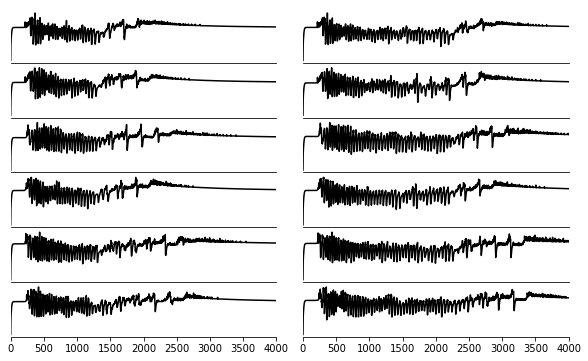

In [84]:
import matplotlib.gridspec as gridspec

files = ['OdorA_D1000_Locust_A_0','OdorA_D2000_Locust_A_0',
'OdorB_D1000_Locust_A_0','OdorB_D2000_Locust_A_0',
'OdorC_D1000_Locust_A_0','OdorC_D2000_Locust_A_0',
'OdorA_D1000_Locust_B_0','OdorA_D2000_Locust_B_0',
'OdorB_D1000_Locust_B_0','OdorB_D2000_Locust_B_0',
'OdorC_D1000_Locust_B_0','OdorC_D2000_Locust_B_0']

plt.figure(figsize=(12,6))
gs1 = gridspec.GridSpec(6, 2)
gs1.update(wspace=0.1, hspace=0.05)

for n,i in enumerate(files):
    temp = np.load(i+"/AL_output.npy").T[:90,:].mean(axis=0)
    ax = plt.subplot(gs1[n])   
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)    
    if n<10:
        plt.xticks([])
    plt.yticks([])
    plt.xlim([0,4000])
    #plt.ylim([0,30])
    plt.plot(temp,'k')
plt.tight_layout()
    #plt.savefig(i.split(".")[0]+'_PNs.png')

Text(0, 0.5, 'LFP Frequency [Hz]')

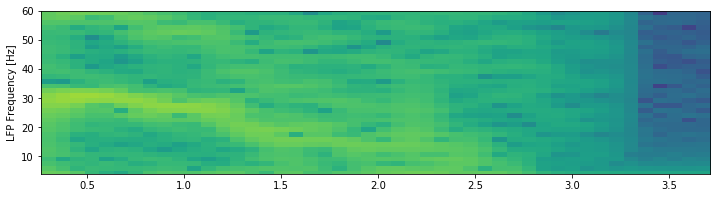

In [216]:
from scipy import signal

dt = 0.001
NFFT = 600 # the length of the windowing segments
Fs = int(1.0 / dt)  # the sampling frequency

fc = 10  # Cut-off frequency of the filter
w = fc / (Fs / 2) # Normalize the frequency
b, a = signal.butter(5, w, 'high')
output = signal.filtfilt(b, a, temp)

temp = np.load("OdorC_D1000_Locust_B_0/AL_output.npy").T[:90,:].mean(axis=0)
plt.figure(figsize=(12,3))
Pxx, freqs, bins, im = plt.specgram(temp, NFFT=NFFT, Fs=Fs, noverlap=525,cmap='viridis')
plt.ylim([4,60])
plt.ylabel("LFP Frequency [Hz]")


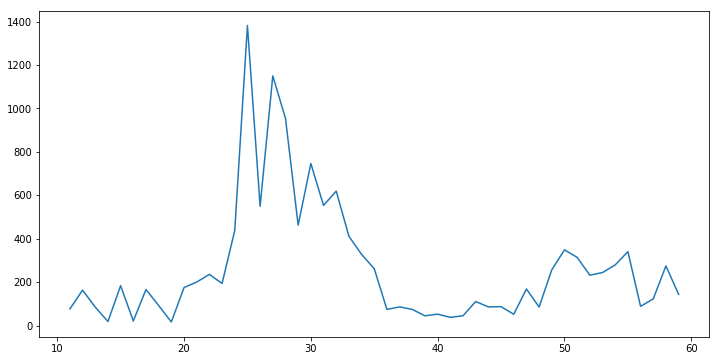

/home/iiser/.conda/envs/venv/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


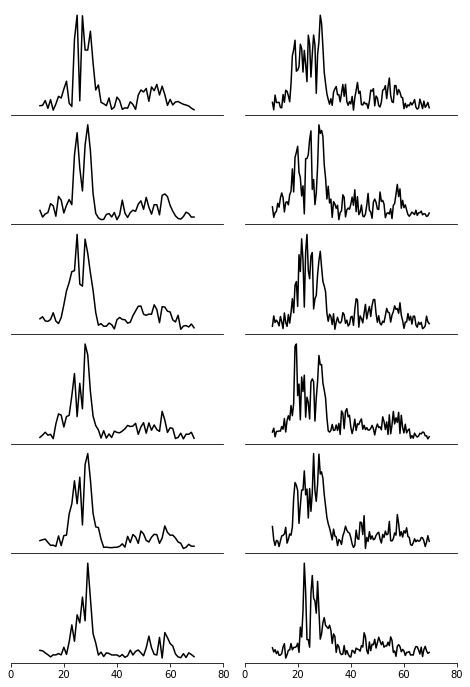

In [232]:
import matplotlib.gridspec as gridspec

files = ['OdorA_D1000_Locust_A_0','OdorA_D2000_Locust_A_0',
'OdorB_D1000_Locust_A_0','OdorB_D2000_Locust_A_0',
'OdorC_D1000_Locust_A_0','OdorC_D2000_Locust_A_0',
'OdorA_D1000_Locust_B_0','OdorA_D2000_Locust_B_0',
'OdorB_D1000_Locust_B_0','OdorB_D2000_Locust_B_0',
'OdorC_D1000_Locust_B_0','OdorC_D2000_Locust_B_0']

plt.figure(figsize=(8,12))
gs1 = gridspec.GridSpec(6, 2)
gs1.update(wspace=0.1, hspace=0.05)

for n,i in enumerate(files):
    temp = np.load(i+"/AL_output.npy").T[:90,:].mean(axis=0)
    ax = plt.subplot(gs1[n])   
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)    
    if n<10:
        plt.xticks([])
    else:
        plt.xticks([0,20,40,60,80])
    plt.yticks([])
    plt.xlim([0,80])
    if i.split("_")[1]=="D1000":
        y=temp[200:1200]
    else:
        y=temp[200:2200]
    Y = np.fft.fft(y)
    freq = np.fft.fftfreq(len(y), 1/1000)
    ind = np.logical_and(freq>10,freq<70)
    plt.plot(freq[ind], np.abs(Y)[ind],'k')
plt.tight_layout()

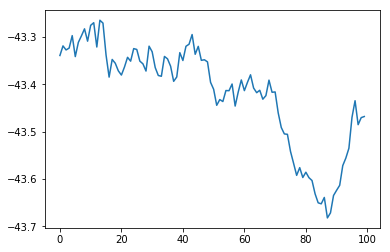

In [249]:
# for i in range(30):
#     plt.plot(model.inverse_transform(100*np.random.normal(size=(2,))))    

plt.plot(model.inverse_transform([0,1]))

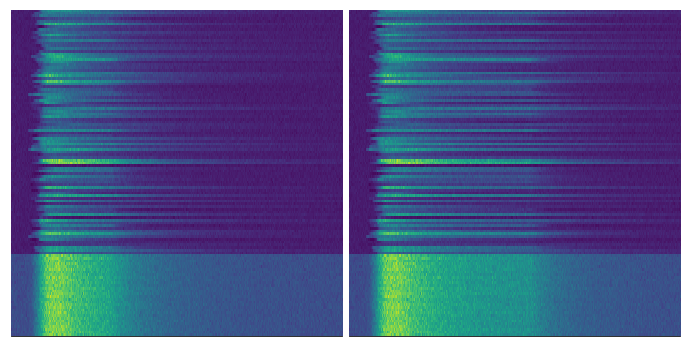

In [242]:
import matplotlib.gridspec as gridspec

files = ['OdorA_D1000_Locust_A_0','OdorA_D2000_Locust_A_0'
]

plt.figure(figsize=(12,6))
gs1 = gridspec.GridSpec(1, 2)
gs1.update(wspace=0.02, hspace=0.05)

for n,i in enumerate(files):
    temp = np.load(i+"/current_input.npy")[:,::100]
    ax = plt.subplot(gs1[n])   
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)    
    if n<10:
        plt.xticks([])
    plt.yticks([])
    plt.xlim([0,4000])
    #plt.ylim([0,30])
    plt.imshow(temp,aspect='auto')
plt.tight_layout()